# <img src="http://drive.google.com/uc?export=view&id=1FOHQtxwXKjBf8E6eAR3Jdgm7kwFnv1Nc" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# <font color='blue'> Table Of Contents </font>

## <font color='blue'> Mining   
* Introduction
* Understanding the concept
* Python Implementation    

</font>  


## <font color='blue'> Consensus  
* Introduction
</font>    


## <font color='blue'> DodoCoin Implementation  
* Python implementation
    * Mining
    * Multiple nodes
</font>    

## Mining

<font size=4> Introduction  </font>

***Blockchain*** is at the center of every cryptocurrency. It is an ***electronic ledger***. Just like any ledger, this ledger too contains a list of records or transactions.  
The electronic ledger is made of blocks and each block contains a number of transactions. *In case of Bitcoin the size of a block is capped at 1MB.*   
Each block has its own ***hash*** value. A ***fingerprint.*** This ensures that once a block is a part of a blockchain, it becomes immutable. In a sense, any change in the block content will render the block and the whole chain after this invalid.   
This hash is also used to create a chain of these blocks.  

***Mining*** is a process of validating the new transactions that are added in the bitcoin network.  
Miners (nodes) do this validation using very sophisticated hardware to solve a cryptographic puzzle.  
The solution of this cryptographic puzzle is a ***hash*** value of a candidate block.  
This hash value is acceptable when it satisfies a certain condition or criteria (***difficulty level***).    
This activity incentivise a miner by creating new bitcoins.   
In Bitcoin network it is called ***Proof of Work*** 


<font size=4> Understanding the concept  </font>

***Cryptographic Puzzle*** - This cryptographic puzzle is an activity of finding a hash value of a candidate block.   
Generating a hash of a block is fairly easy. But, finding a hash value that satisfies a certain condition is what makes this calculation a tough activity.  

Let's understand this concept by playing a game of "guess the number"...

Bob, thinks of a number between 1 - 10000. Then he asks, Alice to guess the number he has thought of.  
Alice knows she has to think of a number between 1 - 10000.  
Alice starts guessing a number, for each guess, Bob acknowledges whether it is correct or not.  
When a correct number is found the round finishes. On each successful guess, Alice gets $10 (to make the game interesting).  
And then it starts all over again.   
*In this scenario, Alcie on an average takes some good amount of time to guess the correct number.*  

To make this process go faster, Joe too joins Alice. Now they both try to guess the number. Bob verifies each number shared by both Alice and Joe.  
*Note: both Alice and Joe do not share the list of rejected numbers with each other. So they both may share a same number with Bob which he has rejected earlier.*  
Even in this scenario, both Alice and Joe they will be able to guess the number much faster than Alice alone.   

Consider a situation, that 8 more people join this guessing game. 10 people will be able to guess the number even faster.  

Now Bob is loosing all the fun. He wants people to guess for at least 10 minutes before they guess the correct number.   

So he decides to think of a number only between 1 - 1000. But the other team still has to think of a number between 1 - 10000.  

*In this scenario* even though we have 10 people guessing for a number. The time taken to guess a correct number will again go up. Bob will invalidate all the numbers after 1000. *And the fun returns* 


Let's, relate the above game with the mining activity.   
The numbers that Alice and team guessed is nothing but the ***hash*** that a mining program generates.  
When a hash does not satisfy a certain condition, it is discarded and miner generates a new hash. 

The bitcoin network started with a certain level of difficulty. Means the generated hash has to be in a certain range.   
As and when more miners are added to the network, the program, increases the ***difficulty level.*** (first x number of digits of the hash value must be 0)  

*So in our game we started with Zero difficulty. Bob thought of a number from 1 - 10000. When 10 people started guessing the number, Bob started thinking of a number between 1 - 1000. This increased the difficulty level, Any guess above 1000 will be invalid.*   

The Bitcoin network ensures that block hash generation should complete in 10 minutes, on an average. And for this the network keeps tweaking the difficulty level of the hash.

**How do we define this difficulty level in Bitcoin Network?**   
Bitcoin network tells the miners, to generate a hash where the first ***n*** digits MUST be 0. Only then it will be considered a valid hash.   
Refer an example below. Any generated hash value $ > 2^{55} - 1$ will be considered an invalid hash

| Table depicting full range of hashes | Table depicting hashes with difficulty level |
| :---: | :---: |
| 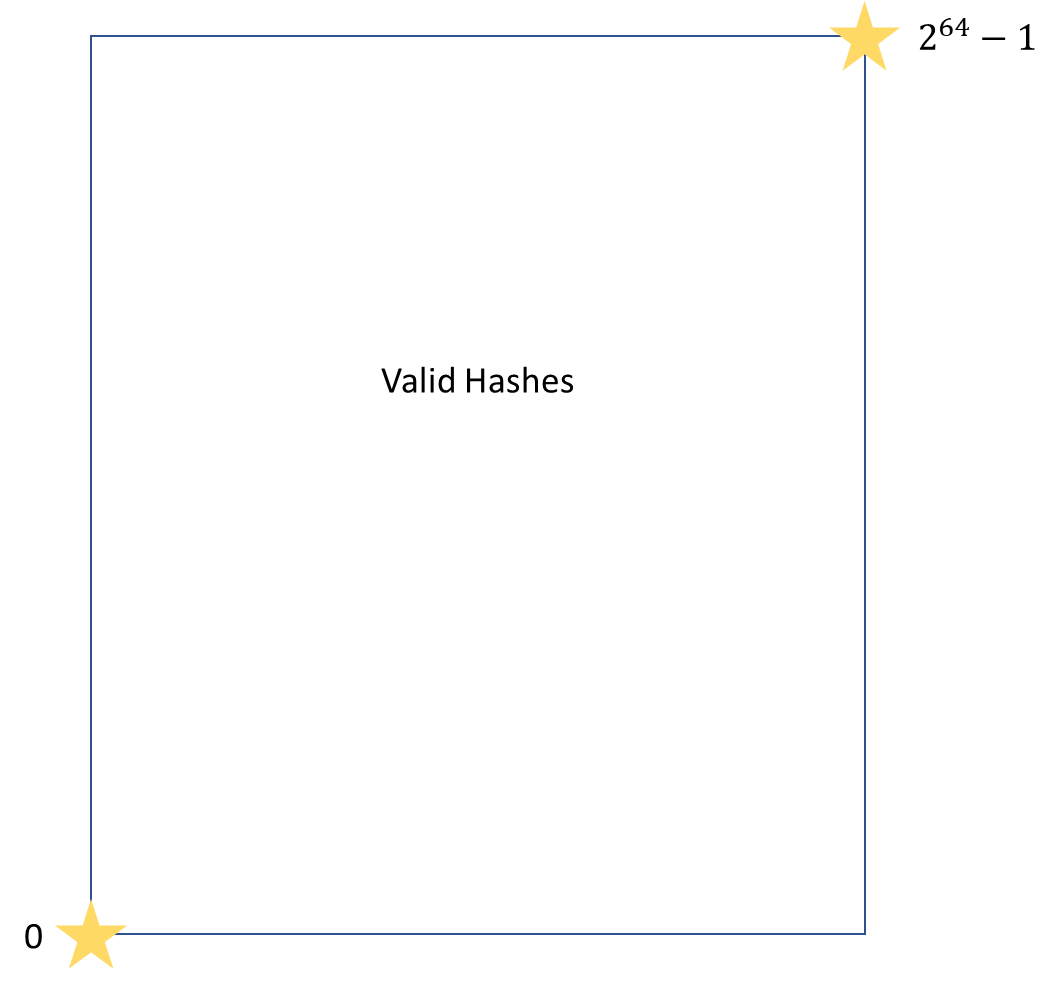 | 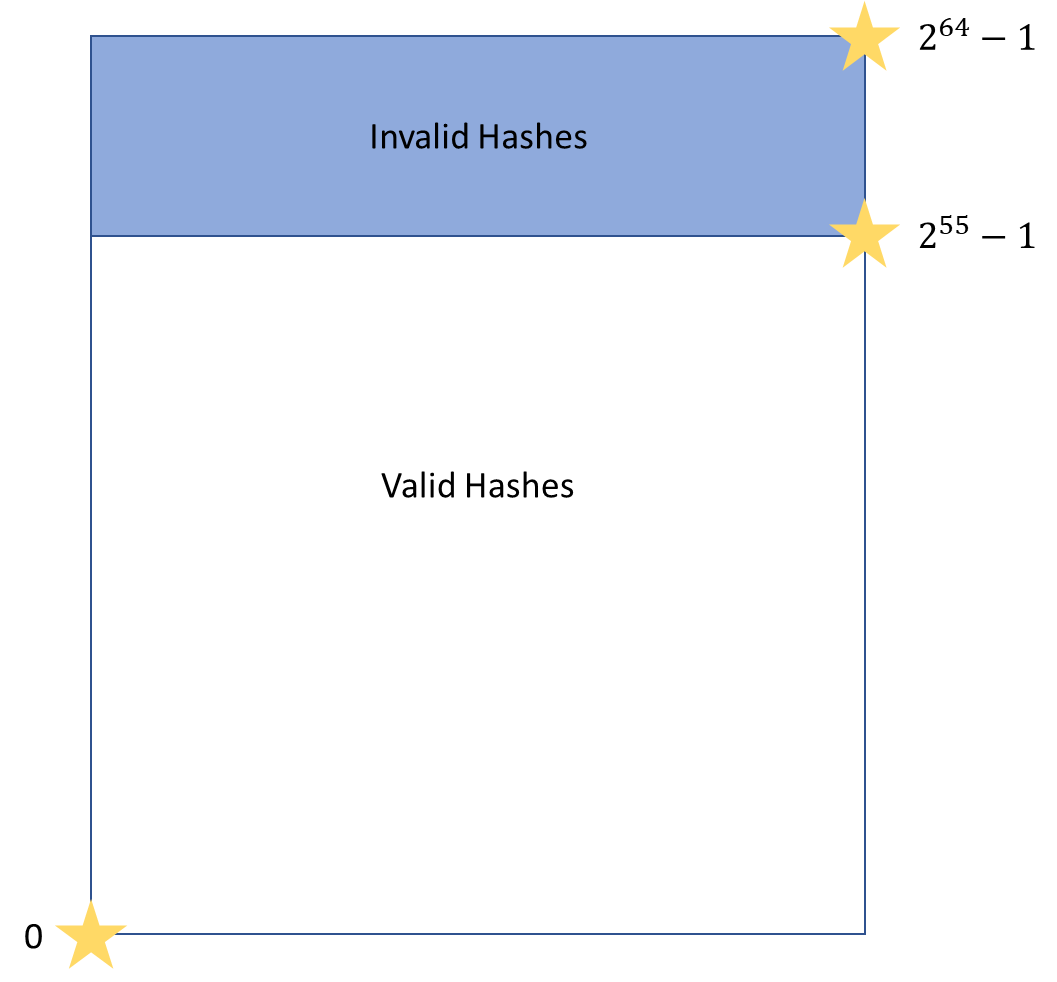 |

***Nonce*** - We know, that the content of a candidate block does not change. So when we generate a hash of this block it may or may not be a valid hash.  
In case it is not a valid one, then we have to change the content of a candidate block. But we cannot add remove the transactions after every incorrect hash generation, this will make the mining even more time consuming.  
To address this, there is one variable available in each candidate block and it is the value of this variable we keep on changing until we find a valid hash. It is a 32 bit (4-byte) field. 

<font size=4> Python Implementation  </font>

In [45]:
import hashlib
import datetime

#Indicates that first 3 bytes of a hash must be 0.
DIFFICULTY_LEVEL = 7

def mine_block_content(block):
    nonce = 0
    while (True):
        new_string = block + str(nonce)
        byte_string = new_string.encode()
        hash_value = hashlib.sha256(byte_string).hexdigest()
        if nonce % 10000000 == 0:
            print(nonce)
        # print()
        if int(hash_value[0:DIFFICULTY_LEVEL], 16) == 0:
            break
        nonce += 1
        
    print(nonce)
    print(hash_value)

start_time = datetime.datetime.now()    
mine_block_content("Sunil")
end_time = datetime.datetime.now()
print(f"Time taken - {end_time-start_time}")

0
10000000
16936214
000000e90d85933036fa29b82446845dfdf351552bf6bd290b5fb16acec270bd
Time taken - 0:00:49.066410


## Consensus

<font size=4> Introduction  </font>

Once a block is mined, the next step is the propagation of this block on the network. *And this is a race against the time*   
Other nodes, when they receive this new block, verify it and then further propagate this block on the network.   
Following representation will give a good glimpse

In [1]:
from IPython.display import Video
Video('Block propogation.mp4', embed=True, width=768, height=384, html_attributes = "loop autoplay")

<font size=4> Longest chain rule  </font>

Now we know that in the Bitcoin network, not all the nodes are connected to each other.  
Each node is connected to a certain number of nodes. *The default value is 8.*  
And the bitcoin network does get into a situation where 2 separate nodes have mined 2 separate blocks. Both blocks are valid.   
Now, both the nodes start propagating its respective new block to its connected nodes. And this leads to a situation where the whole network is divided.   

Let's understand this with the help of an example...  
Node $N_1$ and$N_2$ are two separate nodes. These are not connected directly with each other. Say these are geographically separated.  
Both the nodes mine a block. $N_1$ mines block $B_1$ and $N_2$ mines block $B_2$. Both the blocks are valid.  
Both the nodes now start propagating their respective blocks. This will lead to a situation where half of the network will have $B_1$ and the other half will have $B_2$ as a final block in the chain.  
This is a ***fork*** in the chain. Means we have 2 separate chains in the blockchain.    
To resolve this situation, the netowrk will maintain both the chains, until any one of the chain adds a new block $B_3$ in the end.  
So if $B_3$ is added after $B_1$, the whole network will accept this as a vaild chain and will be propagated throughout the network.  
The block $B_2$, in this case will be invalidated. All the transaction that were processed will go back to the ***mem_pool.***  
This is called the ***Longest chain rule***


## Dodocoin Implementation

We already have seen the implementation of DodoCoin. Here we are going to make some more changes to the code and implement the following features.   

***Block*** - In this updated implementation, we have change the functionality of...  
```block.generate_hash()``` - Now this function, implements the difficulty level functionality. It keeps on generating the hash until it satisfies the given difficulty level.   
A ***Node*** object, while creating a new block, passes on this information.  

***Wallet*** - This class provides the functionality of serializing and deserializing both private and public key.  
In addition to this, one more change is implemented. Whenever a new wallet is created, it is now associated with a node as well.  
*A wallet, after creating a transaction forwards it to it associated node.*   
We have simulated the similar functionality here. The function ```wallet.initiate_transaction()``` will now use the associated node and pass on the transaction for validation. It will not return the transaction.

***Node*** - In this class we have made a good amount of changes. So far we have understood the concept of blockchain using one single node.  
Here in this implementation we have implemented a functionality of using multiple nodes. The intent here is to simulate the communication among different nodes for understanding purpose... 

When first node is created, it copies the ***genesis block***,  that class **Dodocoin** has generated, to its own chain.  
From this point onwards, when a node creates a new block, after successful mining, is added to it's own chain.  

When more nodes are added, there are two options...
1. While creating a new node, associates this with an existing node. In this case, the new node will make a copy of the chain.  
   
2. While creating a new node, do not associate this with any existing node. In this case the new node will have only one block, the genesis block.   
*This association is maintained using a list attribute ***connected_nodes***.*

The node class also provides a functionality of associating a node with more than one nodes. This has two fold purposes...  
1. When a node adds a new block to it's chain, it can propagate the new block to its associated chains. Function ```propagate_new_block_to_connected_nodes```
2. If a node wants, it can check the associated nodes (during the association) and can update it's own chain as well. Function ```connect_with_new_node(node, sync_chain=False)```  

Other functions are ```add_new_block()```. This function is used to add a new block to the associated nodes.  
Function ```show_connected_nodes()`'` lists the nodes connected with this node

***DodoCoin*** - added a functionality of resetting the difficulty level of a block.  

1. Added a new attribute ```difficulty_level=4```. This defines the present difficulty level of a block.  
   *In reality this value in Bitcoin network updates after every 2 week, this ensures that the average time of generating a block remains around 10 minutes.*  
2. While creating the genesis block, the difficulty level is set at 1. There is no specific reason for this.  
3. While creating regular blocks, this difficulty level information is passed to an object of ```Block```. The object uses this while generating hash.  
4. A new function ```DodoCoin.update_difficulty_level()``` has been added to update the difficulty level on the fly.

[Blockchain Difficulty level](https://www.blockchain.com/charts/difficulty)

<font size=3> block.py  </font>

In [5]:
import time
import hashlib
import json


class Block:
    def __init__(self, index, transactions, previous_block_hash, difficulty_level=1, metadata=''):
        self._index = index
        self._timestamp = time.time()
        self._previous_block_hash = previous_block_hash
        self._metadata = metadata
        self._merkle_root = ''
        self._nonce = 0
        self._difficulty_level = difficulty_level
        self._block_hash = ''
        self._transactions = transactions

    def __str__(self):
        return f'\nBlock index: {self._index}' \
               f'\nTimestamp: {self._timestamp}' \
               f'\nPrevious Block Hash: {self._previous_block_hash}' \
               f'\nMetadata: {self._metadata}' \
               f'\nmerkle root: {self._merkle_root}' \
               f'\nNonce: {self._nonce}' \
               f'\nDifficulty level: {self._difficulty_level}' \
               f'\nBlock Hash: {self._block_hash}' \
               f'\nTransactions: {self._transactions}'

    def __repr__(self):
        return self.__str__()

    @property
    def block_hash(self):
        return self._block_hash
    # Now this function generates hash based on the difficulty level of block.
    def generate_hash(self):
        self._merkle_root = self._generate_merkle_root()
        while True: # Keep generating a new hash value
            hash_string = ''.join([
                str(self._index),
                str(self._timestamp),
                str(self._previous_block_hash),
                str(self._metadata),
                str(self._merkle_root),
                str(self._nonce),
                str(self._difficulty_level)
            ])
            encoded_hash_string = hash_string.encode('utf-8')
            hash_value = hashlib.sha256(encoded_hash_string).hexdigest()
            if int(hash_value[:self._difficulty_level], 16) == 0: # Check for difficulty level. 
                break
            self._nonce += 1
        self._block_hash = hash_value

    def _generate_merkle_root(self):
        hash_list = self._create_hash_list(self._transactions)
        return self._create_merkle(hash_list, self._transactions)

    def _create_hash_list(self, transactions):
        new_hash_list = []
        for transaction in transactions:
            transaction_jsonified = json.dumps(transaction)
            x = hashlib.sha256(transaction_jsonified.encode()).hexdigest()
            new_hash_list.append(x)

        return new_hash_list

    def _create_merkle(self, hash_list, transactions):
        if not hash_list:
            print("No transactions. Genesis block. No Merkle root.")
            return None

        if len(hash_list) == 1:
            return hash_list[0]

        while len(hash_list) > 1:
            new_hash_list = []
            # new_transactions_list = []
            # Make number of entries even in the list
            if len(hash_list) % 2 != 0:
                hash_list.append(hash_list[-1])
                # transactions.append(transactions[-1])

            counter = 0
            for index in range(0, len(hash_list), 2):
                # concatenated_transactions = transactions[index] + "+" + transactions[index + 1]
                # new_transactions_list.append(concatenated_transactions)

                concatenated_hash = hash_list[index] + hash_list[index + 1]
                new_hash_list.append(hashlib.sha256(concatenated_hash.encode()).hexdigest())
                # print(f"{new_transactions_list[counter]} - {new_hash_list[counter]}")
                counter += 1

            hash_list = new_hash_list
            # transactions = new_transactions_list
            # print()

        return hash_list[0]

<font size=3> wallet.py  </font>

In [6]:
import json

from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.primitives import serialization


class Wallet:
    def __init__(self, user, node=None):
        self.user = user
        self.__private_key = ''
        self.public_key = ''
        self.associated_node = node  # New attribute. Set during wallet creation. Or explicitly associated with a node
        self.__generate_keys()

    def __generate_keys(self):
        self.__private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
        self.public_key = self.__private_key.public_key()

    def initiate_transaction(self, receiver, coins):
        transaction = {'sender': self.user, "receiver": receiver, "coins": coins}
        
        # This function digitally signs a transaction.
        # This has the following steps
        # 1. We convert the dictionary which contains transaction details to a string
        # For this we convert this to a JSON string.
        transaction_jsonified = json.dumps(transaction)
        # print(transaction_jsonified)
        # 2. Change this string to a byte stream. Call the function encode() to encode the string in utf-8 format
        transaction_jsonified_to_bytes = transaction_jsonified.encode()
        # print(transaction_jsonified_to_bytes)
        # 3. Digitally sign the transaction
        signature = self.__private_key.sign(transaction_jsonified_to_bytes,
                                            padding.PSS(mgf=padding.MGF1(hashes.SHA256()),
                                                        salt_length=padding.PSS.MAX_LENGTH),
                                            hashes.SHA256())

        # 4. Structure the information and pass is back to the caller.
        # This structure will be passed to node for verification.
        # On successful verification, this transaction will be added to the mem_pool
        # a. Sender details. We will use this to pick the public key of sender and validate the transaction
        # b. Signature. Of the transaction
        # c. transaction. Now we are sending encrypted message
        new_transaction = {'sender': self.user,
                           "signature": signature,
                           "transaction_bytes": transaction_jsonified_to_bytes}
        # return new_transaction
        # Instead of returning the transaction, it will be passed to the associated node for validation.
        if self.associated_node:
            self.associated_node.add_new_transaction(new_transaction)

    def serialize_private_key(self):
        private_key_pem = self.__private_key.private_bytes(encoding=serialization.Encoding.PEM,
                                                           format=serialization.PrivateFormat.PKCS8,
                                                           encryption_algorithm=serialization.NoEncryption())

        filename = self.user + "_private_key.pem"
        with open(filename, 'wb') as fhandle:
            fhandle.write(private_key_pem)

    def serialize_public_key(self):
        public_key_pem = self.public_key.public_bytes(encoding=serialization.Encoding.PEM,
                                                      format=serialization.PublicFormat.SubjectPublicKeyInfo )

        filename = self.user + "_public_key.pem"
        with open(filename, 'wb') as fhandle:
            fhandle.write(public_key_pem)

    def deserialize_private_key(self):
        filename = self.user + "_private_key.pem"
        with open(filename, "rb") as fhandle:
            private_key = serialization.load_pem_private_key(fhandle.read(), password=None)

    def deserialize_public_key(self):
        filename = self.user + "_public_key.pem"
        with open(filename, "rb") as fhandle:
            public_key = serialization.load_pem_public_key(fhandle.read())

    def assocate_with_node(self, node):
        self.associated_node = node

<font size=3> node.py  </font>

In [8]:
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.primitives import hashes
from cryptography.exceptions import InvalidSignature
import json

# from dodocoin_4.block import Block


class Node:
    def __init__(self, name, dodocoin, connected_node=None):
        self.node_name = name
        self.cryptocurrency = dodocoin
        self._chain = []
        self.connected_nodes = [connected_node]
        self._get_chain()

    def __str__(self):
        return f'Node - {self.node_name} - Chain:\n{self._chain}'

    def _get_chain(self, connected_node=None):
        if self.connected_nodes[0] is None:
            if self.cryptocurrency.genesis_block is not None:
                self._chain.append(self.cryptocurrency.genesis_block)
        else:
            self._pull_chain_from_a_node(self.connected_nodes[0])

    def _pull_chain_from_a_node(self, node):
        self._chain = []
        for chain_block in node._chain:
            self._chain.append(chain_block)

    def connect_with_new_node(self, node, sync_chain=False):
        if self.connected_nodes[0] is None:
            self.connected_nodes.pop(0)
        self.connected_nodes.append(node)
        node_with_longest_chain = self._check_node_with_longest_chain()
        if sync_chain is True:
            self._pull_chain_from_a_node(node_with_longest_chain)

    def _check_node_with_longest_chain(self):
        node_with_longest_chain = None
        chain_length = 0
        for node in self.connected_nodes:
            if len(node._chain) > chain_length:
                chain_length = len(node._chain)
                node_with_longest_chain = node
        return node_with_longest_chain

    def create_new_block(self):
        new_block = Block(index=len(self._chain), transactions=self.cryptocurrency.mem_pool,
                          difficulty_level=self.cryptocurrency.difficulty_level,
                          previous_block_hash=self._chain[-1].block_hash, metadata='')

        new_block.generate_hash()
        self._chain.append(new_block)
        self.cryptocurrency.mem_pool = []
        if self.connected_nodes[0] is not None:
            self.propagate_new_block_to_connected_nodes(new_block)
        return new_block

    def show_chain(self):
        for chain_block in self._chain:
            print(chain_block)

    def add_new_transaction(self, transaction):
        try:
            self._validate_digital_signature(transaction)
        except InvalidSignature as e:
            print("Invalid signature. Cannot add this transaction")
            return

        if self._validate_receiver(transaction):
            transaction_bytes = transaction['transaction_bytes']
            transaction_data = json.loads(transaction_bytes)
            self.cryptocurrency.mem_pool.append(transaction_data)

    def _validate_digital_signature(self, transaction):
        sender_public_key = self.cryptocurrency.wallets[transaction['sender']]
        signature = transaction['signature']
        transaction_bytes = transaction['transaction_bytes']
        sender_public_key.verify(signature, transaction_bytes,
                                 padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH),
                                 hashes.SHA256())

    def _validate_receiver(self, transaction):
        transaction_bytes = transaction['transaction_bytes']
        transaction_data = json.loads(transaction_bytes)
        # print(transaction_data)
        if transaction_data['receiver'] in self.cryptocurrency.wallets:
            return True
        return False

    def propagate_new_block_to_connected_nodes(self, new_block):
        for connected_node in self.connected_nodes:
            connected_node.add_new_block(new_block)

    def add_new_block(self, node):
        self._chain.append(node)

    def show_connected_nodes(self):
        if self.connected_nodes[0] is not None:
            print(f"{self.node_name} is connected with - ", end="")
            for _node in self.connected_nodes:
                print(_node.node_name, end=", ")
            print()


<font size=3> blockchain.py  </font>

In [9]:
# from dodocoin_3.block import Block


class DodoCoin:
    def __init__(self):
        self.mem_pool = []
        self._genesis_block = None
        self.wallets = {}
        self.difficulty_level = 4 # Added new attribute.
        self.__create_genesis_block()

    def __create_genesis_block(self):
        self._genesis_block = Block(index=0, transactions=[], previous_block_hash=0, difficulty_level=1,
                              metadata='The Times 03/Jan/2009 Chancellor on brink of second bailout for banks Genesis '
                                       'block using same string as bitcoin!')
        self._genesis_block.generate_hash()

    @property
    def genesis_block(self):
        return self._genesis_block

    def register_wallet(self, friendly_name, public_key):
        self.wallets[friendly_name] = public_key

    def list_wallets(self):
        for key, value in self.wallets.items():
            print(f"{key} - {value}")

    def list_pending_transactions(self):
        for transaction in self.mem_pool:
            print(transaction)

    # Added new function.
    def update_difficulty_level(self, new_level):
        self.difficulty_level = new_level


<font size=3> driver_code.py  </font>

In [10]:
# from dodocoin_3.blockchain import DodoCoin
# from dodocoin_3.wallet import Wallet
# from dodocoin_3.node import Node

dodo = DodoCoin()

node_1 = Node("Node-1", dodo)
# node_2 = Node("Node-2", dodo)

# print(node_1)
# print(node_2)

peter_wallet = Wallet('Peter', node_1)
tony_wallet = Wallet('Tony')
strange_wallet = Wallet('Strange')
bruce_wallet = Wallet('Bruce')
steve_wallet = Wallet('Steve')
carol_wallet = Wallet('Carol')
scarlet_wallet = Wallet('Scarlet')
# nebula_wallet = Wallet('Nebula')
# natasha_wallet = Wallet("Natasha")
# shuri_wallet = Wallet('Shuri')

# Register each wallet with Blockchain
dodo.register_wallet(peter_wallet.user, peter_wallet.public_key)
dodo.register_wallet(tony_wallet.user, tony_wallet.public_key)
dodo.register_wallet(strange_wallet.user, strange_wallet.public_key)
dodo.register_wallet(bruce_wallet.user, bruce_wallet.public_key)
dodo.register_wallet(steve_wallet.user, steve_wallet.public_key)
dodo.register_wallet(carol_wallet.user, carol_wallet.public_key)
dodo.register_wallet(scarlet_wallet.user, scarlet_wallet.public_key)
# dodo_chain.register_wallet(nebula_wallet.user, nebula_wallet.public_key)
# dodo_chain.register_wallet(natasha_wallet.user, natasha_wallet.public_key)
# dodo_chain.register_wallet(shuri_wallet.user, shuri_wallet.public_key)

# Show list of registered wallets.
# print("\nList of registered wallets.")
# dodo.list_wallets()
#
transaction = peter_wallet.initiate_transaction(tony_wallet.user, 20)
# node_1.add_new_transaction(transaction)
# print("\nList of pending transactions.")
dodo.list_pending_transactions()
node_1.create_new_block()
node_1.show_chain()

node_2 = Node("Node-2", dodo, node_1)
# print(node_2)

transaction = peter_wallet.initiate_transaction(bruce_wallet.user, 25)
# node_1.add_new_transaction(transaction)
transaction = bruce_wallet.initiate_transaction(peter_wallet.user, 50)
# node_1.add_new_transaction(transaction)
transaction = tony_wallet.initiate_transaction(bruce_wallet.user, 50)
# node_1.add_new_transaction(transaction)
node_1.create_new_block()
#
# transaction = scarlet_wallet.initiate_transaction(peter_wallet.user, 25)
# node_1.add_new_transaction(transaction)
# transaction = carol_wallet.initiate_transaction(steve_wallet.user, 50)
# node_1.add_new_transaction(transaction)
# transaction = steve_wallet.initiate_transaction(bruce_wallet.user, 50)
# node_1.add_new_transaction(transaction)
#
# node_1.create_new_block()
# print("\nPrinting blockchain.")
print(node_1)
print(node_2)




No transactions. Genesis block. No Merkle root.
{'sender': 'Peter', 'receiver': 'Tony', 'coins': 20}

Block index: 0
Timestamp: 1658486645.861084
Previous Block Hash: 0
Metadata: The Times 03/Jan/2009 Chancellor on brink of second bailout for banks Genesis block using same string as bitcoin!
merkle root: None
Nonce: 17
Difficulty level: 1
Block Hash: 049450b46f7a49d9c7a853e4bac4f99b4fa0763ba820bd8532ad4d95ce2dab8c
Transactions: []

Block index: 1
Timestamp: 1658486647.8985236
Previous Block Hash: 049450b46f7a49d9c7a853e4bac4f99b4fa0763ba820bd8532ad4d95ce2dab8c
Metadata: 
merkle root: 659826dba598cb77ad99e43ef857c6ebac32f6d699b85f63af90fa04fd57631f
Nonce: 84060
Difficulty level: 4
Block Hash: 00005685527da754496a863e41eb2dc229c5807f2f10b6420bb0d8773df9eec9
Transactions: [{'sender': 'Peter', 'receiver': 'Tony', 'coins': 20}]
Node - Node-1 - Chain:
[
Block index: 0
Timestamp: 1658486645.861084
Previous Block Hash: 0
Metadata: The Times 03/Jan/2009 Chancellor on brink of second bailout for